In [1]:
import pandas as pd
import numpy as np
import csv as csv
import math
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score
from sklearn.cross_validation import train_test_split
import time
import time
from datetime import date
import datetime

%matplotlib inline

#### Concatenate the two training DataFrames

In [2]:
train_df1 = pd.read_csv('../hackerrank-predict-email-opens-dataset/training_dataset.csv/training_dataset.csv', header=0)  
train_df2 = pd.read_csv('../hackerrank-predict-email-opens-dataset/training_dataset.csv/training_dataset_complement.csv', header=0)  
train_df = pd.concat([train_df1,train_df2])
train_df.shape

(486048, 54)

#### Dropping few columns

In [3]:
train_df = train_df.drop(['user_id','mail_id','mail_type','clicked','hacker_timezone',
                          'mail_category','sent_time','unsubscribed',
                          'open_time','click_time','unsubscribe_time','hacker_created_at'], axis=1) 
train_df.head()

,last_online,contest_login_count,contest_login_count_1_days,contest_login_count_30_days,contest_login_count_365_days,contest_login_count_7_days,contest_participation_count,contest_participation_count_1_days,contest_participation_count_30_days,contest_participation_count_365_days,...,submissions_count_contest,submissions_count_contest_1_days,submissions_count_contest_30_days,submissions_count_contest_365_days,submissions_count_contest_7_days,submissions_count_master,submissions_count_master_1_days,submissions_count_master_30_days,submissions_count_master_365_days,submissions_count_master_7_days
0,1.459520e+09,1,0,0,1,0,1,0,0,1,...,0,0,0,0,0,13,0,0,13,0
1,1.461210e+09,3,0,1,3,0,3,0,1,3,...,16,0,3,16,0,83,0,43,83,4
2,1.463411e+09,3,0,0,3,0,3,0,0,3,...,0,0,0,0,0,16,0,3,16,0
3,1.462768e+09,3,0,0,3,0,3,0,0,3,...,16,0,0,16,0,85,0,9,85,0
4,1.461248e+09,5,0,0,5,0,13,0,0,13,...,17,0,1,17,0,43,0,0,43,0


#### Converting Boolean to Int

In [4]:
train_df['opened'] = train_df.opened.map({True:1,False:0}).astype(int)
train_df['hacker_confirmation'] = train_df.hacker_confirmation.map({True:1,False:0}).astype(int)
train_df.shape


(486048, 42)

#### Dropping rows with NA or Null Values (last_online is the only attribute with NA or Null values)

In [5]:
train_df = train_df.dropna(subset=['last_online'],axis=0)
train_df.shape

(485471, 42)

#### Sorting Columns to data constancy

In [6]:
train_df = train_df.reindex_axis(sorted(train_df.columns), axis=1)
train_df.shape

(485471, 42)

#### Adding opened attribute to the first column of DataFrame

In [7]:
train_df = train_df.reindex_axis(['opened'] + list([col for col in train_df.columns if col != 'opened']), axis=1)
train_df.head()

,opened,contest_login_count,contest_login_count_1_days,contest_login_count_30_days,contest_login_count_365_days,contest_login_count_7_days,contest_participation_count,contest_participation_count_1_days,contest_participation_count_30_days,contest_participation_count_365_days,...,submissions_count_contest,submissions_count_contest_1_days,submissions_count_contest_30_days,submissions_count_contest_365_days,submissions_count_contest_7_days,submissions_count_master,submissions_count_master_1_days,submissions_count_master_30_days,submissions_count_master_365_days,submissions_count_master_7_days
0,1,1,0,0,1,0,1,0,0,1,...,0,0,0,0,0,13,0,0,13,0
1,0,3,0,1,3,0,3,0,1,3,...,16,0,3,16,0,83,0,43,83,4
2,0,3,0,0,3,0,3,0,0,3,...,0,0,0,0,0,16,0,3,16,0
3,0,3,0,0,3,0,3,0,0,3,...,16,0,0,16,0,85,0,9,85,0
4,0,5,0,0,5,0,13,0,0,13,...,17,0,1,17,0,43,0,0,43,0


#### Check for NA values

In [8]:
hasany = False
for cl in train_df.columns.values:
    hasNa = train_df[cl].isnull().sum() > 0
    if hasNa:
        hasany = True
        print cl,train_df[cl].isnull().sum()
if not hasany:
    print 'No NA found'
    

No NA found


#### Check data types for your model

In [9]:
for cl in train_df.columns.values:
    print cl,train_df[cl].dtype

opened int32
contest_login_count int64
contest_login_count_1_days int64
contest_login_count_30_days int64
contest_login_count_365_days int64
contest_login_count_7_days int64
contest_participation_count int64
contest_participation_count_1_days int64
contest_participation_count_30_days int64
contest_participation_count_365_days int64
contest_participation_count_7_days int64
forum_comments_count int64
forum_count int64
forum_expert_count int64
forum_questions_count int64
hacker_confirmation int32
ipn_count int64
ipn_count_1_days int64
ipn_count_30_days int64
ipn_count_365_days int64
ipn_count_7_days int64
ipn_read int64
ipn_read_1_days int64
ipn_read_30_days int64
ipn_read_365_days int64
ipn_read_7_days int64
last_online float64
submissions_count int64
submissions_count_1_days int64
submissions_count_30_days int64
submissions_count_365_days int64
submissions_count_7_days int64
submissions_count_contest int64
submissions_count_contest_1_days int64
submissions_count_contest_30_days int64
su

In [10]:
from sklearn import linear_model
from sklearn import tree
from sklearn import svm
from sklearn import ensemble 
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.learning_curve import validation_curve,learning_curve


train_data = train_df.values
x_train_all = train_data[0::,1::]
y_train_all = train_data[0::,0]

# hipotese = linear_model.LogisticRegression(C=1e5)
# hipotese = tree.DecisionTreeClassifier(random_state=1234)
hipotese = ensemble.RandomForestClassifier(random_state=1234)

# hipotese = svm.SVC()

# hipotese.fit(x_train, y_train)


Validation curve.
-------
##### Determine training and test scores for varying parameter values.
##### Compute scores for an estimator with different values of a specified parameter. <br/> This is similar to grid search with one parameter. However, this will also compute training scores and is merely a utility for plotting the results.

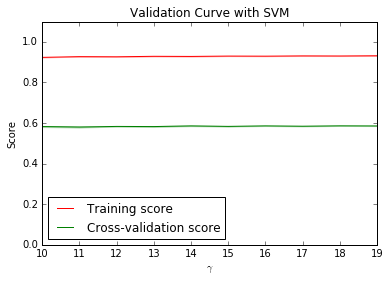

In [11]:
param_range = range(10,200)
train_scores, test_scores = validation_curve(
    hipotese, x_train_all, y_train_all, param_name="n_estimators", param_range=param_range,
    cv=2, scoring="f1_weighted", n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with SVM")
plt.xlabel("$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
plt.plot(param_range, train_scores_mean, label="Training score", color="r")
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2, color="r")
plt.plot(param_range, test_scores_mean, label="Cross-validation score",
             color="g")
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2, color="g")
plt.legend(loc="best")
plt.show()

Learning curve.
------
##### Determines `cross-validated` `training` and `test` `scores` for different training set sizes.
##### A `cross-validation` generator splits the whole dataset k times in training and test data.<br/> Subsets of the training set with varying sizes will be used to `train` the `estimator` and a `score` for each `training subset size` and the `test` set will be computed. 

###### Afterwards, the scores will be averaged over all `k` runs for each `training` subset size.

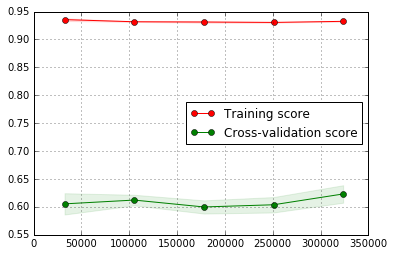

In [12]:
train_sizes, train_scores, test_scores = learning_curve(
        hipotese, x_train_all, y_train_all, cv=3, n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5))
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Cross-validation score")

plt.legend(loc="best")
                    
                    
                    
                    
plt.show()